In [1]:
import numpy as np
import pandas as pd
from os.path import join as pjoin

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

In [2]:
# Useful function for plotting
from typing import Tuple, List
def create_figure(
        nrows: int = 1,
        ncols: int = 1,
        figsize: Tuple[float, float] = None,
        sharex: str = 'none',
        sharey: str = 'none',
        style: str = 'ticks',
        wspace: float = None,
        hspace: float = None,
        width_ratios: List[float] = None,
        height_ratios: List[float] = None,
        constrained_layout: bool = False,
        tight_layout: bool = True,
        reshape: bool = False,
        dpi: float = None,
        **kwargs, ):
    # set some defaults
    sns.set_style(style)
    matplotlib.rcParams['image.interpolation'] = 'none'
    matplotlib.rcParams['grid.linestyle'] = ':'

    figsize = figsize if figsize else plt.rcParams.get('figure.figsize')
    dpi = dpi if dpi else plt.rcParams.get('figure.dpi')

    fig, axes = plt.subplots(
        nrows=nrows,
        ncols=ncols,
        sharex=sharex,
        sharey=sharey,
        tight_layout=tight_layout,
        constrained_layout=constrained_layout,
        figsize=figsize,
        dpi=dpi,
        gridspec_kw={
            'wspace': wspace,
            'hspace': hspace,
            'width_ratios': width_ratios,
            'height_ratios': height_ratios},
        **kwargs,
    )
    if nrows * ncols > 1 and reshape:
        axes = np.reshape(axes, (nrows, ncols))
    return fig, axes

## Load data

In [3]:
load_dir = '/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp'
file = pjoin(load_dir, 'data_indiv_joyneel.df')
df = pd.read_pickle(file)

In [4]:
df

,index,mode,oc_idx,interval,subject,color,se,mean,run
0,0,bold-lite,1,"(0.2, 0.4]",1,#3d6af5,3.633067,28.301887,1
1,1,bold-lite,1,"(0.2, 0.4]",2,#3d6af5,1.517693,9.756098,1
2,2,bold-lite,1,"(0.2, 0.4]",3,#3d6af5,3.396161,4.166667,1
3,3,bold-lite,1,"(0.2, 0.4]",4,#3d6af5,3.997587,8.333333,1
4,4,bold-lite,1,"(0.2, 0.4]",5,#3d6af5,3.159651,23.333333,1
...,...,...,...,...,...,...,...,...,...
4795,2395,ca2,5,"(0.8, 1.0]",6,#a03df5,3.490997,41.176471,12
4796,2396,ca2,5,"(0.8, 1.0]",7,#a03df5,4.481941,63.157895,12
4797,2397,ca2,5,"(0.8, 1.0]",8,#a03df5,4.142803,57.500000,12
4798,2398,ca2,5,"(0.8, 1.0]",9,#a03df5,9.867186,69.230769,12


## Structure

There are two data modalities, ```ca2``` and ```'bold-lite```.  For each modality we have 10 animals, 3 sessions, and 4 runs each.  Here ```df['run']``` is a number between 1 and 12, where runs 1, 2, 3, 4 correspond to session 1, runs 5, 6, 7, 8 to session 2, and so on.  There are num_k = 5 community indices.

In [5]:
num_sessions = 3
num_k = len(df['oc_idx'].unique())
num_runs = len(df['run'].unique())
num_k, num_runs

(5, 12)

## Plot all runs for a single animal
Here's an example how to plot values for all runs for a single animal and data modality.

In [6]:
mode = 'bold-lite'
anim = 0

selected_df = df.loc[
    (df['subject'] == anim + 1) &
    (df['mode'] == mode)
]

Here I have data from only 1 animal ```(anim = 0)``` from a single data modality ```mode = 'bold-lite'```.

In [7]:
selected_df

,index,mode,oc_idx,interval,subject,color,se,mean,run
0,0,bold-lite,1,"(0.2, 0.4]",1,#3d6af5,3.633067,28.301887,1
10,10,bold-lite,1,"(0.2, 0.4]",1,#3d6af5,3.633067,44.230769,2
20,20,bold-lite,1,"(0.2, 0.4]",1,#3d6af5,3.633067,36.956522,3
30,30,bold-lite,1,"(0.2, 0.4]",1,#3d6af5,3.633067,33.962264,4
40,40,bold-lite,1,"(0.2, 0.4]",1,#3d6af5,3.633067,39.024390,5
...,...,...,...,...,...,...,...,...,...
2350,2350,bold-lite,5,"(0.8, 1.0]",1,#a03df5,2.634818,22.448980,8
2360,2360,bold-lite,5,"(0.8, 1.0]",1,#a03df5,2.634818,21.052632,9
2370,2370,bold-lite,5,"(0.8, 1.0]",1,#a03df5,2.634818,24.489796,10
2380,2380,bold-lite,5,"(0.8, 1.0]",1,#a03df5,2.634818,26.530612,11


### Plot for anim = 0, mode = 'bold-lite'

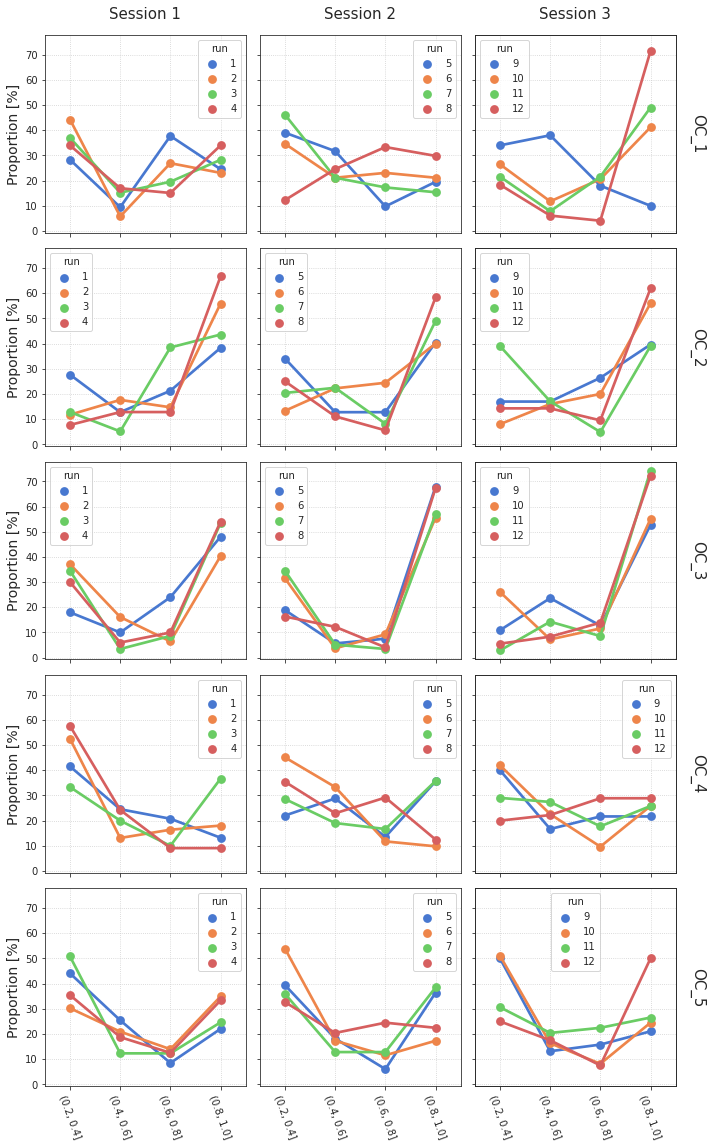

In [8]:
fig, axes = create_figure(5, 3, (10, 16), 'all', 'all')
for i in range(num_k):
    for j in range(num_sessions):
        a = 1 + num_runs // num_sessions * j
        b = 1 + num_runs // num_sessions * (j + 1)
        _df = selected_df.loc[
            (selected_df['oc_idx'] == i + 1) &
            (selected_df['run'].isin(range(a, b)))
        ]
        ax = axes[i, j]
        sns.pointplot(
            data=_df,
            x='interval',
            y='mean',
            hue='run',
            palette='muted',
            ax=ax,
        )
        if i == 0:
            t = f"Session {j + 1}"
            ax.set_title(t, fontsize=15, y=1.05)
        if j % 3 == 0:
            ylbl = 'Proportion [%]'
        else:
            ylbl = ''
        ax.set_ylabel(ylbl, fontsize=14)

        if j == 2:
            axtw = ax.twinx()
            axtw.set_ylabel(f"OC_{i + 1}", fontsize=15, rotation=-90, labelpad=30)
            axtw.yaxis.set_label_position("right")
            axtw.set_yticks([])

        ax.tick_params(axis='x', rotation=-70)
        ax.set_xlabel('')
        ax.grid()
plt.show()

## Plot average over all runs for all animals

In [9]:
mako = sns.color_palette('mako', as_cmap=True)
rocket = sns.color_palette('rocket', as_cmap=True)
pal = {'ca2': mako(0.65), 'bold-lite': rocket(0.6)}

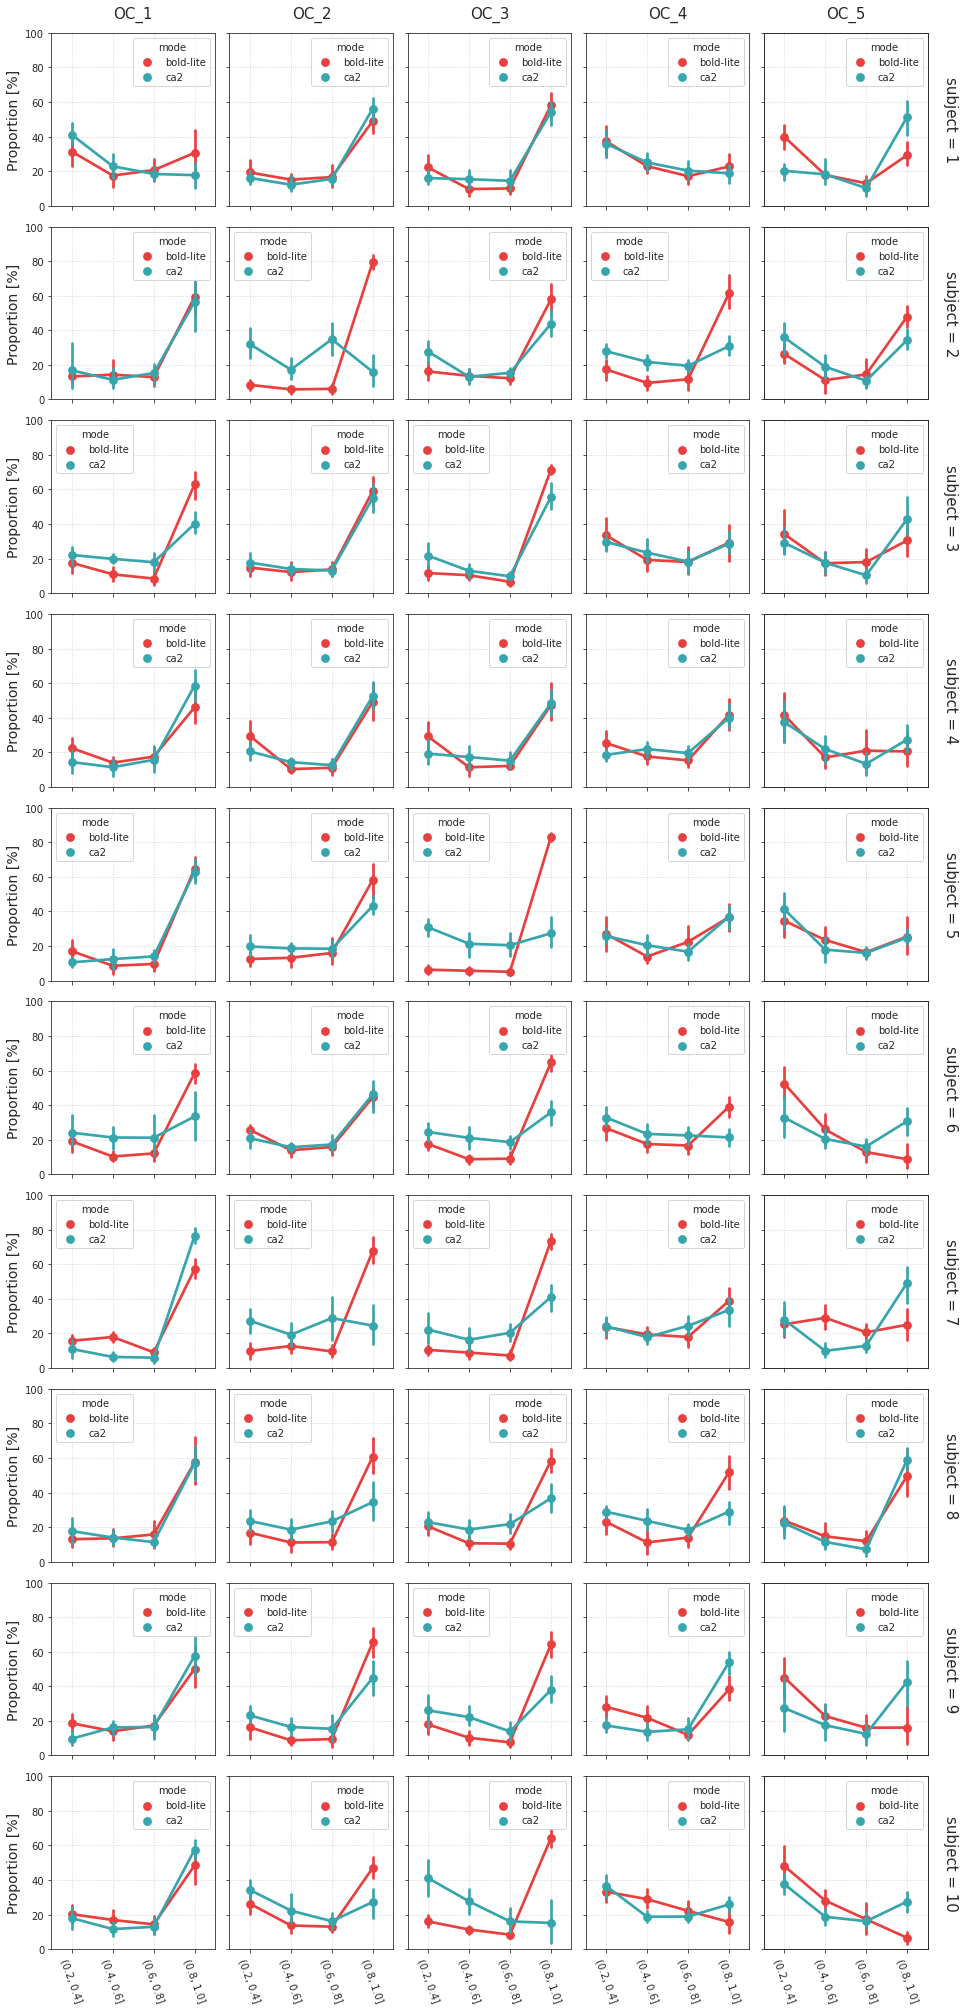

In [10]:
fig, axes = create_figure(10, 5, (13.5, 28), 'all', 'all')

oc_idxs = df['oc_idx'].unique()
for i in range(10):
    for j in range(num_k):
        ax = axes[i, j]
        _df = df.loc[
            (df['subject'] == i + 1) &
            (df['oc_idx'] == j + 1)
        ]
        sns.pointplot(
            data=_df,
            x='interval',
            y='mean',
            hue='mode',
            ci=99,
            palette=pal,
            ax=ax,
        )
        if i == 0:
            t = f"OC_{j + 1}"
            ax.set_title(t, fontsize=15, y=1.05)
        if j % 5 == 0:
            ylbl = 'Proportion [%]'
        else:
            ylbl = ''
        ax.set_ylabel(ylbl, fontsize=14)
        
        if j == 4:
            axtw = ax.twinx()
            axtw.set_ylabel(f"subject = {i + 1}", fontsize=15, rotation=-90, labelpad=30)
            axtw.yaxis.set_label_position("right")
            axtw.set_yticks([])
        
        ax.tick_params(axis='x', rotation=-70)
        ax.set_xlabel('')
        ax.set_ylim(0, 100)
        ax.grid()
plt.show()